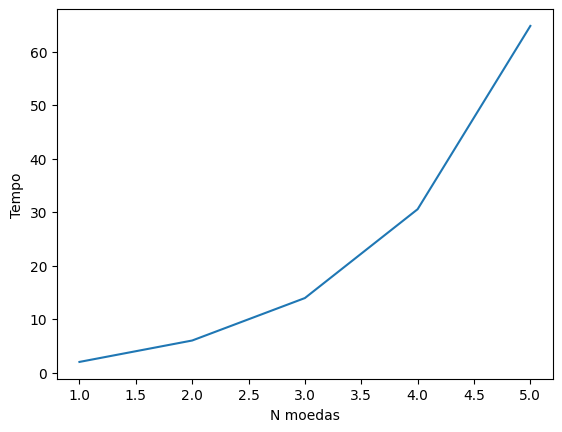

In [20]:
# 1)

import numpy as np
import matplotlib.pyplot as plt

def simulate(N: int) -> int:
    consecutive_heads = 0
    steps = 0

    while True:
        steps += 1
        toss = np.random.randint(0, 2)
        consecutive_heads = consecutive_heads + 1 if toss == 1 else 0

        if consecutive_heads == N:
            break

    return steps

def monte_carlo():
    times = 1_000
    N = 6
    x = []
    y = []

    for i in range(1, N):
        acc = 0
        x.append(i)

        for j in range(times):
            acc += simulate(i)
        
        y.append(acc / times)

    plt.xlabel('N moedas')
    plt.ylabel('Tempo')
    plt.plot(x, y)

monte_carlo()


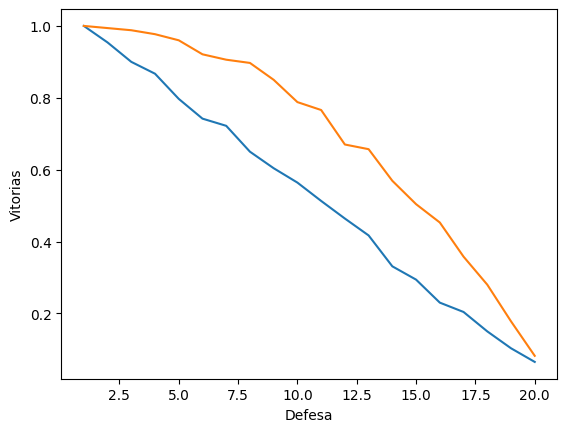

In [24]:
# 2)

import numpy as np
import matplotlib.pyplot as plt

def attack(defense: int, advantage: bool) -> bool:
    atk1 = np.random.randint(1, 21)
    if not advantage:
        return True if atk1 >= defense else False

    atk2 = np.random.randint(1, 21)
    real_atk = max(atk1, atk2)

    return True if real_atk >= defense else False


def monte_carlo(has_advantage: True):
    times = 1000
    x = []
    y = []

    for D in range(1, 21):
        acc = 0
        x.append(D)
        for i in range(times):
            if attack(D, has_advantage):
                acc += 1
        y.append(acc / times)

    plt.xlabel('Defesa')
    plt.ylabel('Vitorias')
    plt.plot(x, y)

monte_carlo(False)
monte_carlo(True)


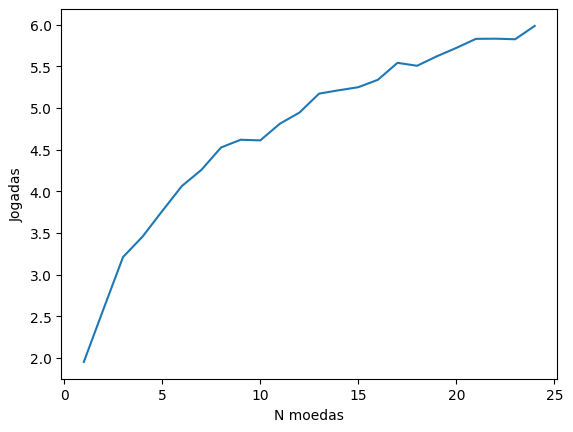

In [39]:
# 3)

import numpy as np
import matplotlib.pyplot as plt

def toss_n_coins(start: int):
    faces = ['H', 'T']
    n = start
    steps = 0

    while True:
        steps += 1
        coins = [np.random.choice(faces) for _ in range(n)]
        n = coins.count('T')

        if n == 0:
            break

    return steps

def monte_carlo():
    times = 1000
    x = []
    y = []

    for n in range(1, 25):
        acc = 0
        for i in range(times):
            acc += toss_n_coins(n)
        x.append(n)
        y.append(acc / times)
    
    plt.xlabel('N moedas')
    plt.ylabel('Jogadas')
    plt.plot(x, y)
        
monte_carlo()

In [ ]:
# 4)

import numpy as np
import matplotlib.pyplot as plt